# Human Activity Recognition Using Custom Deep Learning Model

**Date:** Sun Apr 15 16:45:07 2019  
**Author:** Gaddisa Olani

## Instructions

Select all and run it. You will get the answer to all the questions. By default, it is set to use the Adam Optimizer, but you can change the `optimization_option` variable to either 1 or 2, which stands for SGD and Adagrad optimizer, respectively.

---

**NOTICE:**  
I IMPLEMENTED ALL THE OPTIMIZATION METHODS, NETWORK DESIGN, ACTIVATION FUNCTIONS, AND TRAINING IN PURE PYTHON FROM SCRATCH.

THANK YOU.

---


# Imported Libraries

- `numpy` as `np`
- `pandas` as `pd`
- `tqdm.trange` (added to show the progress of learning at each iteration)
- `matplotlib.pyplot` as `plt`
- `sklearn.manifold.TSNE`
- `sklearn.decomposition.PCA`
- `sklearn.model_selection.GridSearchCV`
- `sklearn.model_selection.train_test_split`
- `sklearn.metrics.classification_report`
- `sklearn.metrics.accuracy_score`


In [1]:
import numpy as np
import pandas as pd
from tqdm import trange #added to show the progress of learning at each iteration
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

## Custom Neural Network Structure

This custom neural network is implemented from scratch in Python, without relying on any built-in libraries. It consists of several classes representing different layers and operations commonly used in neural networks.

### Key Components:

- **Layer Class**: Base class for all types of layers. Includes methods for initialization and forward pass.

- **Dense Class**: Represents a fully connected layer. Includes methods for initialization, forward pass, and backward pass (backpropagation).

- **ReLU Class**: Represents the Rectified Linear Unit activation function.

- **AdamOptimizer Class**: Implements the Adam optimization algorithm.

### Explanation:

- **Initialization**: Weights are initialized with small random numbers, usually drawn from a normal distribution. Biases are often initialized to zeros.

- **Forward Pass**: Propagates input data through the network layers. Each layer multiplies input by weights, adds biases, and applies activation functions.

- **Backpropagation**: Computes gradients of the loss function with respect to weights and biases. Updates parameters using optimization algorithms like Adam, SGD, or Adagrad.

- **Activation Functions**: ReLU is used for introducing non-linearity.

- **Optimization Algorithm**: Adam optimizer adapts learning rates for each parameter during training, leading to faster convergence and better performance.

### Customization and Usage:

Users can adjust the network architecture, number of layers, units per layer, activation functions, and optimization algorithms according to their requirements.

This custom neural network structure provides a basic framework for building and training neural networks from scratch, facilitating a deeper understanding of deep learning principles.


In [2]:
class Layer:
    def __init__(self):
        """Here you can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        self.weights = np.zeros(shape=(input.shape[1], 10))
        self.bias = np.zeros(shape=(10,))
        pass
    
    def forward_pass(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, 10]
        """
        output = np.matmul(input, self.weights) + self.bias
        return output

class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        self.learning_rate = learning_rate
        
        # initialize weights with small random numbers. I use normal initialization
        self.weights = np.random.randn(input_units, output_units)*0.01
        self.biases = np.zeros(output_units)
        
    def forward_pass(self,input):
        return np.matmul(input, self.weights) + self.biases
      
    def backward(self,input,grad_output):
        # use a chain rule to calculate the weight and bias 
        grad_input = np.dot(grad_output,np.transpose(self.weights))

        # compute gradient w.r.t. weights and biases
        grad_weights = np.transpose(np.dot(np.transpose(grad_output),input))
        grad_biases = np.sum(grad_output, axis = 0)
        
        """
        Optimzation Using Adam
        call our adam optimizer class
        """
        if optimization_option==0:
            #adam optimizer
            adam_optimizer_weights = AdamOptimizer(self.weights, alpha=0.01)
            self.weights = adam_optimizer_weights.backward_pass(grad_weights)
        
        
            adam_optimizer_biases = AdamOptimizer(self.biases, alpha=0.01)
            self.biases = adam_optimizer_biases.backward_pass(grad_biases)
       
        elif optimization_option==1:
            #SGD optimizer
            self.weights=self.weights-self.learning_rate * grad_weights
            self.biases = self.biases - self.learning_rate * grad_biases
            
        else:
            #which means adagrad implementation
            weight_cache= np.square(grad_weights)
            self.weights=self.weights - 0.01 * grad_weights / (10**-6 + np.sqrt(weight_cache))
        
            bias_cache= np.square(grad_biases)
            self.biases=self.biases - 0.01 * grad_biases / (10**-6 + np.sqrt(bias_cache))
            
            
        return grad_input

class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward_pass(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        return np.maximum(0,input)

    def backward(self, input, grad_output):
        """Compute gradientof this activation"""
        relu_grad = input > 0
        return grad_output*relu_grad 

#implement AdamOptimizer algorith, I initialize those parameter 
#according to the best setting defined by most data scientists 
class AdamOptimizer:
    def __init__(self, weights, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0
        self.theta = weights
        
    def backward_pass(self, gradient):
        self.t = self.t + 1
        self.m = self.beta1*self.m + (1 - self.beta1)*gradient
        self.v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
        m_hat = self.m/(1 - self.beta1**self.t)
        v_hat = self.v/(1 - self.beta2**self.t)
        
        #self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))

        self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))
        return self.theta


def crossentropy_loss_calculation(last_layer_act_value,reference_answers):
    """
    Calculate the crossentropy loss for each minibatches
    
    using the simplified loss formula (to avoid division) of minibatch cross entropy loss
    
    """
    a = last_layer_act_value[np.arange(len(last_layer_act_value)),reference_answers]
    
    cross_entropy = - a + np.log(np.sum(np.exp(last_layer_act_value),axis=-1))
    
    return cross_entropy

def gradientof_crossentropy_loss_calculation(last_layer_act_value,reference_answers):
    """Compute crossentropy gradient from last_layer_act_value"""
    
    a = np.zeros_like(last_layer_act_value)
    a[np.arange(len(last_layer_act_value)),reference_answers] = 1
    
    softmax = np.exp(last_layer_act_value) / np.exp(last_layer_act_value).sum(axis=-1,keepdims=True)
    
    return (- a + softmax) / last_layer_act_value.shape[0]


#after the grid search we found the following network structure
def create_the_network(hidden_layers=1,hidden_unit=100):
    #input layer
    network.append(Dense(X_train.shape[1],hidden_unit))
    network.append(ReLU())
    
    #add n hidden layers
    for i in range(hidden_layers):
        network.append(Dense(hidden_unit,hidden_unit))
        network.append(ReLU())
    
    #outputlayer
    network.append(Dense(hidden_unit,6))


def forward_pass(network, X):
    """
    Compute activations of all network layers by applying them sequentially.
    Return a list of activations for each layer. 
    using a python list I store the gradient of all layers in the form
    of table to avoid repetitive computation during backpropagation
    """
    activations = []
    #input = X
    for i in range(len(network)):
        activations.append(network[i].forward_pass(X))
        X = network[i].forward_pass(X)
        
    assert len(activations) == len(network)
    #return the activation of each layer
    return activations

### Training the Network

Train the network on a given batch of input data `X` and labels `y` using the following steps:

1. **Forward Pass**: Run `forward_pass` to compute activations for all layers in the network.

2. **Backpropagation**: Execute `layer.backward` starting from the last layer to the first layer. After calling `backward` for all layers, all Dense layers have made one gradient step.

By following these steps, the network learns from the input data and updates its parameters to minimize the loss function.


In [4]:

def train(network,X,y):
    """
    Train network on a given batch of X and y.
    Step 1:  run forward_pass to get all layer activations.
    Step 2:  Then you can run layer.backward going from last to first layer.
    After you called backward for all layers, all Dense layers have already made one gradient step.
    """
    
    # Step 1: Get the layer activations
    layer_activations = forward_pass(network,X)
    
    last_layer_act_value = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = crossentropy_loss_calculation(last_layer_act_value,y)
    
    loss_of_the_gradient = gradientof_crossentropy_loss_calculation(last_layer_act_value,y)
    
    """
    The lenght of my network is five: 
        Input layer (dense)
        Activation Layer (Relu)
        Dense Layer()
        Activation Layer (Relu)
        Output Dense Layer(100,6)

    """
    
    for i in range(1, len(network)):
        loss_of_the_gradient = network[len(network) - i].backward(layer_activations[len(network) - i - 1], loss_of_the_gradient)

    return np.mean(loss)

"""
 #######################################################################################################################
 ## tO FIND THE OPTIMAL PARAMETERS GRIDSEARCH IMPLEMENTATION OF sklearn.model_selection WAS USED    ####################
 ##     I RUN IT ONE TIME BECOUSE IT TAKES TO MUCH TIME ON MY PC TO PROVIDE THE RESULT              ####################
 ##     THE FINAL OUTPUT OF RUNNING A GRID SEARCH WAS DISCUSSED IN MY REPORT                        ####################
 #######################################################################################################################

"""

def do_the_GridSeach(model,X,y):
    # define the grid search parameters
    hidden_layers=[1,2,3,4,5]
    hidden_unit=[10,50,100,150,200]
    learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
    batch_size = [32, 64, 128, 256, 512,1024]
    epochs = [10, 50, 100,140,200,500,1000]
    param_grid = dict(hidden_layers=hidden_layers,hidden_unit=hidden_unit,learn_rate=learn_rate,batch_size=batch_size, epochs=epochs)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
#create minibatch size 
def create_minibatches(inputs, targets, batchsize, shuffle=True):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
        
#give unseen dataset_ test set perform a  classification based on the learned weights and bias term
def prediction_on_test_dataset(X_test):
    last_layer_act_value = forward_pass(network,X)[-1]
    predicted_values=last_layer_act_value.argmax(axis=-1)
    
    #since we already subtracted one from the class label, know we add one to the final output
    predicted_values+=1
    #save the prediction resut to a text file by a name ....
    pd.DataFrame(predicted_values).to_csv("106062867_Ac.csv")

def precision_recall_f1(X_val,y_val):
    print("#####################################################################")
    print("Answer for question 1) ii")
    predicted_values,x=predict(network,X_val)
    target_names = ['class dws', 'class ups', 'class sit','class std','class wlk','class jog']
    print(classification_report(y_val, predicted_values, digits=4,target_names=target_names))

#prediction a training and validation phase
def predict(network,X):
    """
    Compute network predictions.
    """
    last_layer_act_value = forward_pass(network,X)[-1]
    
    current_loss=last_layer_act_value
    
    #pass two parameters one the classification result and also the loss value
    
    return last_layer_act_value.argmax(axis=-1),current_loss


#everything that we need to train our network is packed her
def begin_the_training():
    number_of_epochs=140
    for epoch in range(number_of_epochs):
        for x_batch,y_batch in create_minibatches(X_train,y_train,batchsize=batch_size,shuffle=True):
            train(network,x_batch,y_batch)
        
        
        """
        Record the training accuracy, validation accuracy
        Record the training loss and validation loss
        Finally plot the curve at the end of the epochs
        """
        training_predicted_value,training_loss=predict(network,X_train)
        train_accuracy_log.append(np.mean(training_predicted_value==y_train))
        train_loss.append(np.mean(crossentropy_loss_calculation(training_loss,y_train)))
        
        val_predicted_value,validation_loss=predict(network,X_val)
        val_accuracy_log.append(np.mean(val_predicted_value==y_val))
        val_loss.append(np.mean(crossentropy_loss_calculation(validation_loss,y_val)))
        
        print("Epoch",epoch)
        print("Train accuracy:",train_accuracy_log[-1])
        print("Val accuracy:",val_accuracy_log[-1])
   
   
    #plot the training  accuracy vs validation accuracy
    plt.plot(train_accuracy_log,label='train accuracy')
    plt.plot(val_accuracy_log,label='val accuracy')
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title("model acc")
    plt.grid()
    plt.show()
    
    
    #plot the trainin loss and validation loss
    
    plt.plot(train_loss,label='training loss')
    plt.plot(val_loss,label='validation loss')
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("model loss")
    plt.grid()
    plt.show()

## Data Visualization

Visualizing data is an essential step in the data analysis process. It helps in understanding the underlying patterns, relationships, and distributions present in the data. Here are some common data visualization techniques:


In [6]:
def visualize_using_pca(x_val,y_val):
    pca = PCA(n_components=2)
    
    principalComponents = pca.fit_transform(X_val)
    
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    
    yy=pd.DataFrame(data=y_val,columns=['Activities_Types'] )
    finalDf = pd.concat([principalDf, yy], axis = 1)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('Using PCA', fontsize = 20)
    
     #0=dws, 1=ups,2=sit, 3=std,4=wlk,5=jog
    targets = [0, 1,2,3,4,5]
    colors = ['g', 'b', 'c','m', 'y', 'r']
    
    
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Activities_Types'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    targets=['dws','ups','sit','std','wlk','jog']
    ax.legend(targets)
    ax.grid()
    
#visualization using PCA answer for 1Vi
def visualize_using_tsne(x_val,y_val):
    
    
    tsne = TSNE(n_components=2, random_state=0)
    
    principalComponents = tsne.fit_transform(X_val)
    
    #0=dws, 1=ups,2=sit, 3=std,4=wlk,5=jog
    targets = [0, 1,2,3,4,5]

    
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    
    yy=pd.DataFrame(data=y_val,columns=['Activities_Types'] )
    finalDf = pd.concat([principalDf, yy], axis = 1)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('Using TSNE', fontsize = 20)
    colors = ['g', 'b', 'c','m', 'y', 'r']
    
    
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Activities_Types'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    targets=['dws','ups','sit','std','wlk','jog']
    ax.legend(targets)
    ax.grid()

## Main Function

The main function of the program orchestrates the execution flow and controls the overall behavior of the application. It typically performs the following tasks:

1. **Data Preprocessing**: Loading and preprocessing the dataset, including tasks such as data cleaning, feature engineering, and splitting the data into training and testing sets.

2. **Model Initialization**: Initializing the neural network model or any other machine learning model that will be used for analysis.

3. **Training the Model**: Training the model on the training data, which involves iterative optimization of the model parameters using techniques like backpropagation and gradient descent.

4. **Model Evaluation**: Evaluating the performance of the trained model on the testing data, typically using metrics such as accuracy, precision, recall, F1-score, etc.

5. **Visualization**: Visualizing the results, including plots, charts, and graphs to illustrate the patterns, trends, and insights learned from the data.

6. **Saving Results**: Saving the trained model, evaluation metrics, and visualizations to disk for future reference or deployment.



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 183.65it/s]

Epoch 0
Train accuracy: 0.4418974126191557
Val accuracy: 0.4591651542649728
Epoch 1
Train accuracy: 0.6926917839310032
Val accuracy: 0.6969147005444646
Epoch 2
Train accuracy: 0.6804357694053563
Val accuracy: 0.6869328493647913



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 200.34it/s]

Epoch 3
Train accuracy: 0.7126645483431684
Val accuracy: 0.7268602540834845
Epoch 4
Train accuracy: 0.7428506581933727
Val accuracy: 0.7495462794918331
Epoch 5
Train accuracy: 0.7725828415796641
Val accuracy: 0.7803992740471869



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 201.74it/s]

Epoch 6
Train accuracy: 0.7641852019972765
Val accuracy: 0.7822141560798548
Epoch 7
Train accuracy: 0.7743985474353154
Val accuracy: 0.7903811252268602
Epoch 8
Train accuracy: 0.7784838856105311
Val accuracy: 0.7921960072595281



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 9
Train accuracy: 0.7941443486155243
Val accuracy: 0.8039927404718693
Epoch 10
Train accuracy: 0.8002723558783477
Val accuracy: 0.8021778584392014
Epoch 11
Train accuracy: 0.8057194734453018
Val accuracy: 0.8121597096188747


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 196.67it/s]

Epoch 12
Train accuracy: 0.8147980027235587
Val accuracy: 0.8248638838475499
Epoch 13
Train accuracy: 0.8109396277802996
Val accuracy: 0.822141560798548
Epoch 14
Train accuracy: 0.8159328188833409
Val accuracy: 0.8248638838475499



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 171.18it/s]

Epoch 15
Train accuracy: 0.8177485247389923
Val accuracy: 0.8321234119782214
Epoch 16
Train accuracy: 0.8218338629142079
Val accuracy: 0.8330308529945554
Epoch 17
Train accuracy: 0.8231956423059464
Val accuracy: 0.8312159709618875



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 195.17it/s]

Epoch 18
Train accuracy: 0.8091239219246482
Val accuracy: 0.8148820326678766
Epoch 19
Train accuracy: 0.8098048116205174
Val accuracy: 0.8176043557168784
Epoch 20
Train accuracy: 0.8216068996822514
Val accuracy: 0.8266787658802178



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 21
Train accuracy: 0.8227417158420336
Val accuracy: 0.8330308529945554
Epoch 22
Train accuracy: 0.8172945982750794
Val accuracy: 0.8266787658802178
Epoch 23
Train accuracy: 0.8322741715842034
Val accuracy: 0.8366606170598911


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 196.16it/s]

Epoch 24
Train accuracy: 0.8372673626872447
Val accuracy: 0.8448275862068966
Epoch 25
Train accuracy: 0.8404448479346346
Val accuracy: 0.8430127041742287
Epoch 26
Train accuracy: 0.8388561053109397
Val accuracy: 0.8439201451905626



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 200.54it/s]

Epoch 27
Train accuracy: 0.849750340444848
Val accuracy: 0.852994555353902
Epoch 28
Train accuracy: 0.8413527008624603
Val accuracy: 0.8393829401088929
Epoch 29
Train accuracy: 0.8483885610531094
Val accuracy: 0.8439201451905626



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 195.07it/s]

Epoch 30
Train accuracy: 0.8447571493418067
Val accuracy: 0.8439201451905626
Epoch 31
Train accuracy: 0.8427144802541988
Val accuracy: 0.8411978221415608
Epoch 32
Train accuracy: 0.842260553790286
Val accuracy: 0.8402903811252269



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 33
Train accuracy: 0.8443032228778938
Val accuracy: 0.8439201451905626
Epoch 34
Train accuracy: 0.8440762596459374
Val accuracy: 0.8457350272232305
Epoch 35
Train accuracy: 0.8470267816613709
Val accuracy: 0.8493647912885662


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 191.46it/s]

Epoch 36
Train accuracy: 0.8477076713572401
Val accuracy: 0.838475499092559
Epoch 37
Train accuracy: 0.8499773036768044
Val accuracy: 0.8448275862068966
Epoch 38
Train accuracy: 0.8524738992283251
Val accuracy: 0.8566243194192378



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 200.87it/s]

Epoch 39
Train accuracy: 0.8572401270994099
Val accuracy: 0.8620689655172413
Epoch 40
Train accuracy: 0.8502042669087608
Val accuracy: 0.8511796733212341
Epoch 41
Train accuracy: 0.8583749432591921
Val accuracy: 0.8593466424682396



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 204.50it/s]

Epoch 42
Train accuracy: 0.8604176123467998
Val accuracy: 0.8602540834845736
Epoch 43
Train accuracy: 0.8624602814344077
Val accuracy: 0.8620689655172413
Epoch 44
Train accuracy: 0.8620063549704948
Val accuracy: 0.8602540834845736



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 203.68it/s]

Epoch 45
Train accuracy: 0.8576940535633227
Val accuracy: 0.8602540834845736
Epoch 46
Train accuracy: 0.8522469359963686
Val accuracy: 0.8584392014519057
Epoch 47
Train accuracy: 0.8647299137539719
Val accuracy: 0.8620689655172413



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 48
Train accuracy: 0.8586019064911484
Val accuracy: 0.8584392014519057
Epoch 49
Train accuracy: 0.8642759872900591
Val accuracy: 0.8602540834845736
Epoch 50
Train accuracy: 0.8645029505220154
Val accuracy: 0.8656987295825771


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 51
Train accuracy: 0.859963685882887
Val accuracy: 0.8611615245009074
Epoch 52
Train accuracy: 0.861552428506582
Val accuracy: 0.8620689655172413
Epoch 53
Train accuracy: 0.8663186563776668
Val accuracy: 0.8647912885662432


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 145.28it/s]


Epoch 54
Train accuracy: 0.867453472537449
Val accuracy: 0.8638838475499092
Epoch 55
Train accuracy: 0.867453472537449
Val accuracy: 0.8638838475499092
Epoch 56
Train accuracy: 0.8601906491148434
Val accuracy: 0.8566243194192378


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 205.95it/s]

Epoch 57
Train accuracy: 0.8629142078983205
Val accuracy: 0.8539019963702359
Epoch 58
Train accuracy: 0.8667725828415797
Val accuracy: 0.8584392014519057
Epoch 59
Train accuracy: 0.8663186563776668
Val accuracy: 0.8638838475499092



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 204.87it/s]

Epoch 60
Train accuracy: 0.8633681343622334
Val accuracy: 0.8602540834845736
Epoch 61
Train accuracy: 0.8645029505220154
Val accuracy: 0.8593466424682396
Epoch 62
Train accuracy: 0.865864729913754
Val accuracy: 0.8656987295825771
Epoch 63
Train accuracy: 0.868588288697231
Val accuracy: 0.8656987295825771



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 184.69it/s]

Epoch 64
Train accuracy: 0.8699500680889696
Val accuracy: 0.868421052631579
Epoch 65
Train accuracy: 0.870177031320926
Val accuracy: 0.868421052631579
Epoch 66
Train accuracy: 0.8694961416250567
Val accuracy: 0.8702359346642469



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 174.08it/s]


Epoch 67
Train accuracy: 0.8740354062641852
Val accuracy: 0.8729582577132486
Epoch 68
Train accuracy: 0.8729005901044031
Val accuracy: 0.8747731397459165
Epoch 69
Train accuracy: 0.8715388107126646
Val accuracy: 0.8729582577132486


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 195.90it/s]

Epoch 70
Train accuracy: 0.8763050385837494
Val accuracy: 0.8784029038112523
Epoch 71
Train accuracy: 0.8769859282796187
Val accuracy: 0.8756805807622504
Epoch 72
Train accuracy: 0.8706309577848389
Val accuracy: 0.8620689655172413



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 189.58it/s]

Epoch 73
Train accuracy: 0.8688152519291875
Val accuracy: 0.8711433756805808
Epoch 74
Train accuracy: 0.8724466636404903
Val accuracy: 0.8711433756805808
Epoch 75
Train accuracy: 0.8699500680889696
Val accuracy: 0.8711433756805808



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 194.60it/s]

Epoch 76
Train accuracy: 0.8808443032228779
Val accuracy: 0.8774954627949183
Epoch 77
Train accuracy: 0.8774398547435316
Val accuracy: 0.8729582577132486
Epoch 78
Train accuracy: 0.8667725828415797
Val accuracy: 0.8584392014519057



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 207.91it/s]

Epoch 79
Train accuracy: 0.873354516568316
Val accuracy: 0.8638838475499092
Epoch 80
Train accuracy: 0.8747162959600545
Val accuracy: 0.868421052631579
Epoch 81
Train accuracy: 0.8808443032228779
Val accuracy: 0.8702359346642469



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 201.08it/s]

Epoch 82
Train accuracy: 0.8765320018157059
Val accuracy: 0.868421052631579
Epoch 83
Train accuracy: 0.8778937812074444
Val accuracy: 0.867513611615245
Epoch 84
Train accuracy: 0.8842487517022243
Val accuracy: 0.8765880217785844



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 85
Train accuracy: 0.874489332728098
Val accuracy: 0.8666061705989111
Epoch 86
Train accuracy: 0.8749432591920109
Val accuracy: 0.8666061705989111
Epoch 87
Train accuracy: 0.8715388107126646
Val accuracy: 0.8647912885662432


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 185.28it/s]

Epoch 88
Train accuracy: 0.879255560599183
Val accuracy: 0.8756805807622504
Epoch 89
Train accuracy: 0.8706309577848389
Val accuracy: 0.8611615245009074
Epoch 90
Train accuracy: 0.8822060826146164
Val accuracy: 0.8738656987295825



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 91
Train accuracy: 0.8785746709033136
Val accuracy: 0.868421052631579
Epoch 92
Train accuracy: 0.8794825238311393
Val accuracy: 0.8720508166969148
Epoch 93
Train accuracy: 0.8856105310939628
Val accuracy: 0.8756805807622504


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 94
Train accuracy: 0.879255560599183
Val accuracy: 0.867513611615245
Epoch 95
Train accuracy: 0.8799364502950522
Val accuracy: 0.8720508166969148
Epoch 96
Train accuracy: 0.8758511121198366
Val accuracy: 0.868421052631579


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 184.67it/s]

Epoch 97
Train accuracy: 0.8735814798002723
Val accuracy: 0.8593466424682396
Epoch 98
Train accuracy: 0.8826600090785293
Val accuracy: 0.8738656987295825
Epoch 99
Train accuracy: 0.8849296413980935
Val accuracy: 0.8865698729582577



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 197.20it/s]

Epoch 100
Train accuracy: 0.8847026781661371
Val accuracy: 0.8820326678765881
Epoch 101
Train accuracy: 0.8772128915115751
Val accuracy: 0.8693284936479129
Epoch 102
Train accuracy: 0.8826600090785293
Val accuracy: 0.8765880217785844



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 208.43it/s]

Epoch 103
Train accuracy: 0.8842487517022243
Val accuracy: 0.882940108892922
Epoch 104
Train accuracy: 0.8808443032228779
Val accuracy: 0.8711433756805808
Epoch 105
Train accuracy: 0.879255560599183
Val accuracy: 0.8711433756805808



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 190.49it/s]

Epoch 106
Train accuracy: 0.8778937812074444
Val accuracy: 0.8647912885662432
Epoch 107
Train accuracy: 0.880390376758965
Val accuracy: 0.8693284936479129
Epoch 108
Train accuracy: 0.8815251929187472
Val accuracy: 0.8774954627949183



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 109
Train accuracy: 0.8833408987743986
Val accuracy: 0.8756805807622504
Epoch 110
Train accuracy: 0.8849296413980935
Val accuracy: 0.8802177858439202
Epoch 111
Train accuracy: 0.8858374943259192
Val accuracy: 0.8765880217785844


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 112
Train accuracy: 0.8826600090785293
Val accuracy: 0.8720508166969148
Epoch 113
Train accuracy: 0.8817521561507036
Val accuracy: 0.8729582577132486
Epoch 114
Train accuracy: 0.880390376758965
Val accuracy: 0.8702359346642469


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 183.39it/s]

Epoch 115
Train accuracy: 0.8806173399909215
Val accuracy: 0.8693284936479129
Epoch 116
Train accuracy: 0.8772128915115751
Val accuracy: 0.8693284936479129
Epoch 117
Train accuracy: 0.8853835678620063
Val accuracy: 0.8847549909255898



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 212.47it/s]

Epoch 118
Train accuracy: 0.8833408987743986
Val accuracy: 0.8747731397459165
Epoch 119
Train accuracy: 0.8847026781661371
Val accuracy: 0.8784029038112523
Epoch 120
Train accuracy: 0.8847026781661371
Val accuracy: 0.8802177858439202



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 210.11it/s]

Epoch 121
Train accuracy: 0.8801634135270087
Val accuracy: 0.8756805807622504
Epoch 122
Train accuracy: 0.8808443032228779
Val accuracy: 0.8747731397459165
Epoch 123
Train accuracy: 0.8815251929187472
Val accuracy: 0.8747731397459165



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 181.07it/s]

Epoch 124
Train accuracy: 0.877666817975488
Val accuracy: 0.8656987295825771
Epoch 125
Train accuracy: 0.8769859282796187
Val accuracy: 0.8629764065335753
Epoch 126
Train accuracy: 0.8808443032228779
Val accuracy: 0.8720508166969148



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 127
Train accuracy: 0.8840217884702678
Val accuracy: 0.8747731397459165
Epoch 128
Train accuracy: 0.8781207444394008
Val accuracy: 0.8666061705989111
Epoch 129
Train accuracy: 0.8806173399909215
Val accuracy: 0.8729582577132486


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 193.32it/s]

Epoch 130
Train accuracy: 0.879255560599183
Val accuracy: 0.8656987295825771
Epoch 131
Train accuracy: 0.8840217884702678
Val accuracy: 0.8738656987295825
Epoch 132
Train accuracy: 0.8826600090785293
Val accuracy: 0.8702359346642469



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 172.18it/s]

Epoch 133
Train accuracy: 0.8788016341352701
Val accuracy: 0.8666061705989111
Epoch 134
Train accuracy: 0.879255560599183
Val accuracy: 0.868421052631579
Epoch 135
Train accuracy: 0.88515660463005
Val accuracy: 0.8820326678765881



100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 195.52it/s]

Epoch 136
Train accuracy: 0.8815251929187472
Val accuracy: 0.8693284936479129
Epoch 137
Train accuracy: 0.8797094870630958
Val accuracy: 0.8666061705989111
Epoch 138
Train accuracy: 0.8860644575578757
Val accuracy: 0.8784029038112523


Epoch 139
Train accuracy: 0.8876532001815706
Val accuracy: 0.882940108892922


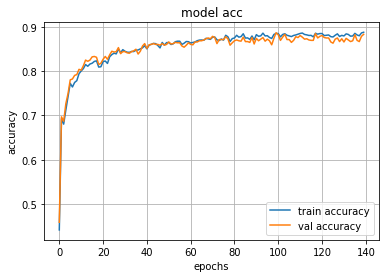

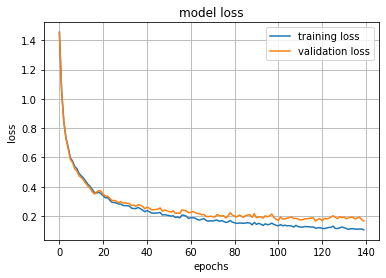

In [10]:
if __name__ == '__main__':
    np.random.seed(42)
    #read the entire dataset
    datasets = pd.read_csv('Data.csv',header=0)
    
    X,y=datasets[datasets.columns.difference(['Activities_Types'])],datasets.loc[:,'Activities_Types']
    
    X,y=X.values,y.values
    
    """
    in the trainin dataset the Activities type starts with 1 and ends at 6
    to make it easy for one hot encoding I subtract one from the y_vale
    and now it becomes 0,1,2,3,4,5 which stands for 0=dws, 1=ups,2=sit, 3=std,4=wlk,5=jog
    later on when we save the test set to a file we will add one to the predicted value
    """
    y=y-1
    
    #do the split training 80% and validation 20%
    
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size = 0.2,random_state=40)
     #build the deep learning network based on the output after we performed a grdi searc
    network = []
    create_the_network()
  
    #variables to record the training accuracy and validation accuracy
    train_accuracy_log = []
    val_accuracy_log = []
    
    train_loss=[]
    val_loss=[]
    
    
    """
    ################################################################################################
    ###                        Hint : switching variable                                         ###
    ###   optimization_option=0 means adam optimizer                                             ###
    ###   optimization_option=1 means SGD                                                        ###
    ###   optimization_option=2 means adagrad                                                    ###
    ##             Thus change the value of this parameter and rerun it to see the difference    ###
    ################################################################################################
            
    """
    
    # I set the defaoult to adam 
    #change this value and rerun the model
    optimization_option=2
    #based on the GridSearch Value I found the following best paramaters for accuracy
    
    if optimization_option==0:
         batch_size=512
    elif optimization_option==1:
         batch_size=128
    else:
        #means adagrad
        batch_size=512
    """
    #start the training procees, show the training progress, display accuracy at each epochs, and finally plot
    #the training accuracy vs validation accuracy
    """
    begin_the_training()
    
    

    
    


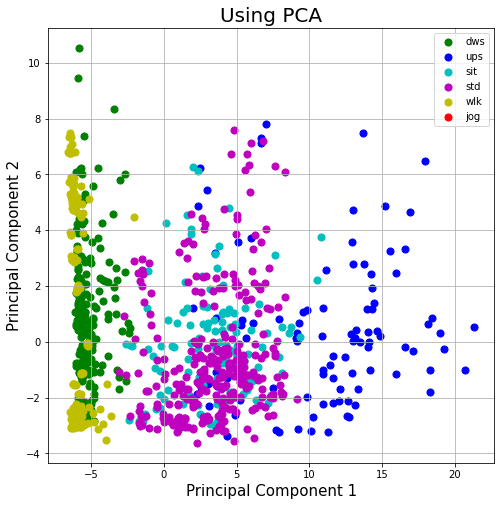

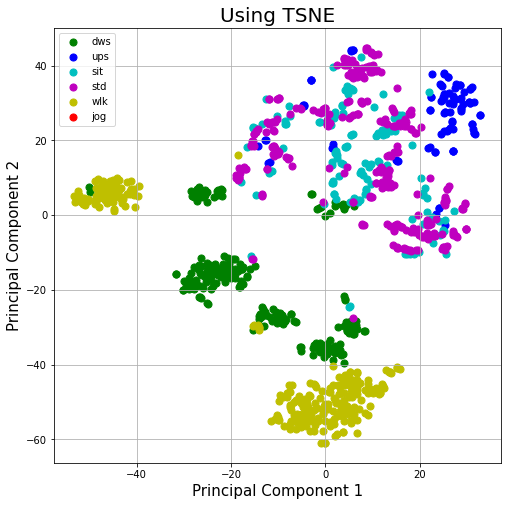

In [11]:

    
    visualize_using_pca(X_val,y_val)
    visualize_using_tsne(X_val,y_val)
    